# Customer Attrition Risk Modeling: Predicting High-Risk Customer Exits in Telecom Using Data Science and ML 


## 1. Project Overview

### Business Problem
Telecommunications companies face significant revenue losses due to customer churn. For a telecom provider, it costs 5-10 times more to acquire a new customer than to retain an existing one. This project aims to develop a machine learning model that can predict which customers are likely to churn, enabling targeted retention strategies.

### Project Objectives
1. Build a robust predictive model for customer churn
2. Identify key factors influencing customer decisions to leave
3. Develop actionable insights for customer retention
4. Create a deployment-ready solution with proper evaluation metrics

### Dataset
We'll use IBM's Telco Customer Churn dataset, which contains information about:
- Customer demographics
- Account information
- Services subscribed to
- Churn status

## 2. Environment Setup & Data Import

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, classification_report
import xgboost as xgb
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
import shap
import pickle
import warnings
warnings.filterwarnings('ignore')

In [52]:
%matplotlib inline


In [53]:
# Set styling for visualizations
plt.style.use('fivethirtyeight')
sns.set_palette('Set2')
pd.set_option('display.max_columns', None)


In [54]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [56]:
df.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [57]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

## 3. Exploratory Data Analysis (EDA)

### 3.1 Initial Data Inspection

In [59]:
print (f"DataSet Shape:{df.shape}")
print (f"\n Columns: {df.columns.tolist()}")
print (f"\n Data Types:")
print(df.dtypes)

DataSet Shape:(7043, 21)

 Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

 Data Types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [60]:
# Check for missing values
missing_values=df.isnull().sum()
print("\n Missing Values:")
print(missing_values[missing_values>0])


 Missing Values:
Series([], dtype: int64)


In [61]:
# Check for duplicates
duplicates=df.duplicated().sum()
duplicates

0

In [62]:
#summary Statistics 
print("Summary Statistics")
print(df.describe(include='all').T)

Summary Statistics
                   count unique               top  freq       mean        std  \
customerID          7043   7043        7590-VHVEG     1        NaN        NaN   
gender              7043      2              Male  3555        NaN        NaN   
SeniorCitizen     7043.0    NaN               NaN   NaN   0.162147   0.368612   
Partner             7043      2                No  3641        NaN        NaN   
Dependents          7043      2                No  4933        NaN        NaN   
tenure            7043.0    NaN               NaN   NaN  32.371149  24.559481   
PhoneService        7043      2               Yes  6361        NaN        NaN   
MultipleLines       7043      3                No  3390        NaN        NaN   
InternetService     7043      3       Fiber optic  3096        NaN        NaN   
OnlineSecurity      7043      3                No  3498        NaN        NaN   
OnlineBackup        7043      3                No  3088        NaN        NaN   
DevicePro

### 3.2 Target Variable Analysis

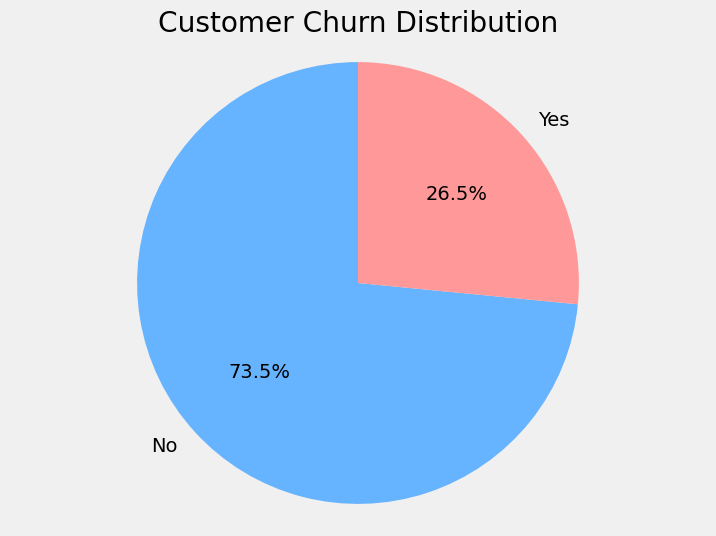

In [64]:
# Distribution of churn
plt.figure(figsize=(8,6))
churn_counts=df['Churn'].value_counts()
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90,colors=['#66b3ff','#ff9999'])
plt.title("Customer Churn Distribution")
plt.axis('equal')
plt.show()


In [65]:
print (f"Churn Rate: {round(df['Churn'].value_counts(normalize=True)['Yes']*100,2)}%")

Churn Rate: 26.54%


In [66]:
# Convert 'TotalCharges' to numeric
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')

In [67]:
#Fill the missing values in total charges column 
mask=df['TotalCharges'].isnull()
df.loc[mask,'TotalCharges']=df.loc[mask,'MonthlyCharges']*df.loc[mask,'tenure']

### 3.3 Feature Analysis

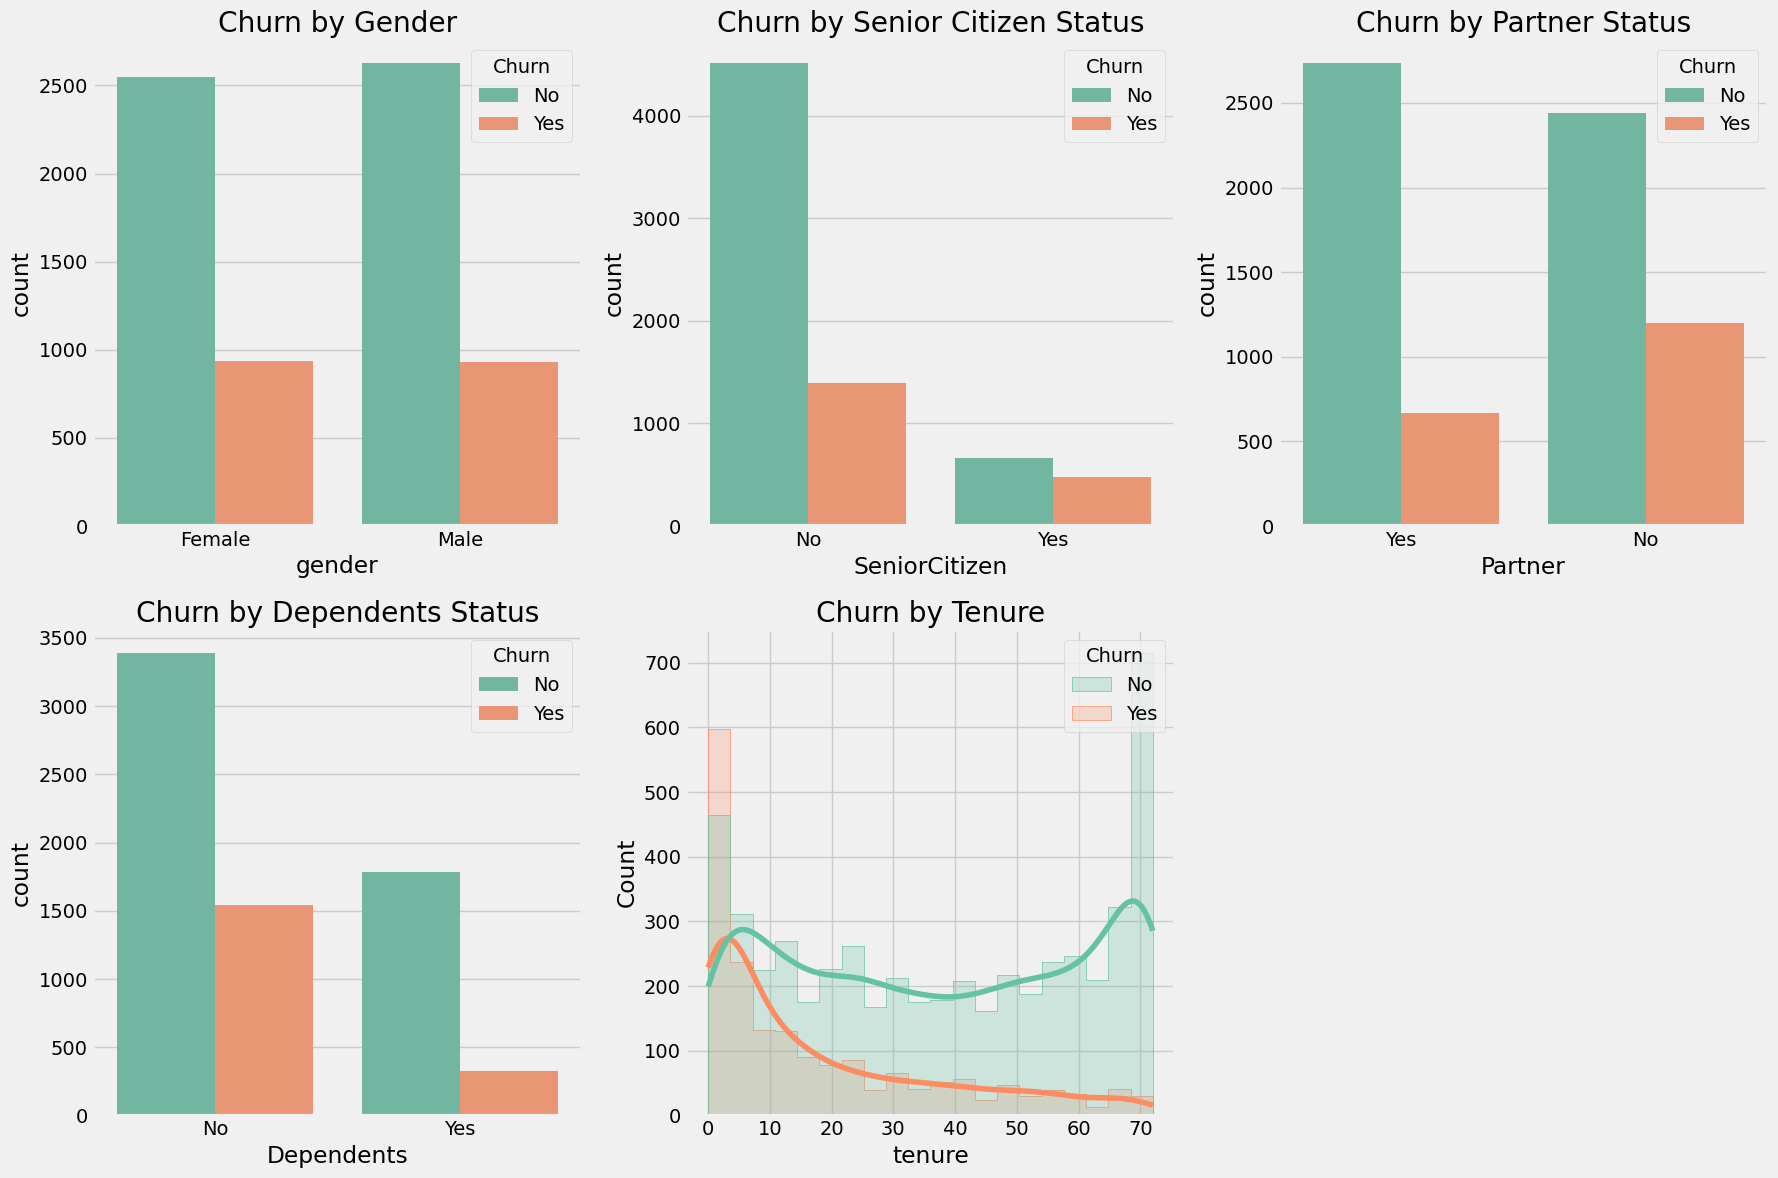

In [69]:
# Demographic analysis
plt.figure(figsize=(18, 12))

# Gender distribution
plt.subplot(2, 3, 1)
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Churn by Gender')

# Senior citizen distribution
plt.subplot(2, 3, 2)
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)
plt.title('Churn by Senior Citizen Status')
plt.xticks([0, 1], ['No', 'Yes'])

# Partner distribution
plt.subplot(2, 3, 3)
sns.countplot(x='Partner', hue='Churn', data=df)
plt.title('Churn by Partner Status')

# Dependents distribution
plt.subplot(2, 3, 4)
sns.countplot(x='Dependents', hue='Churn', data=df)
plt.title('Churn by Dependents Status')

# Tenure distribution
plt.subplot(2, 3, 5)
sns.histplot(data=df, x='tenure', hue='Churn', bins=20, kde=True, element='step')
plt.title('Churn by Tenure')

plt.tight_layout()
plt.show()

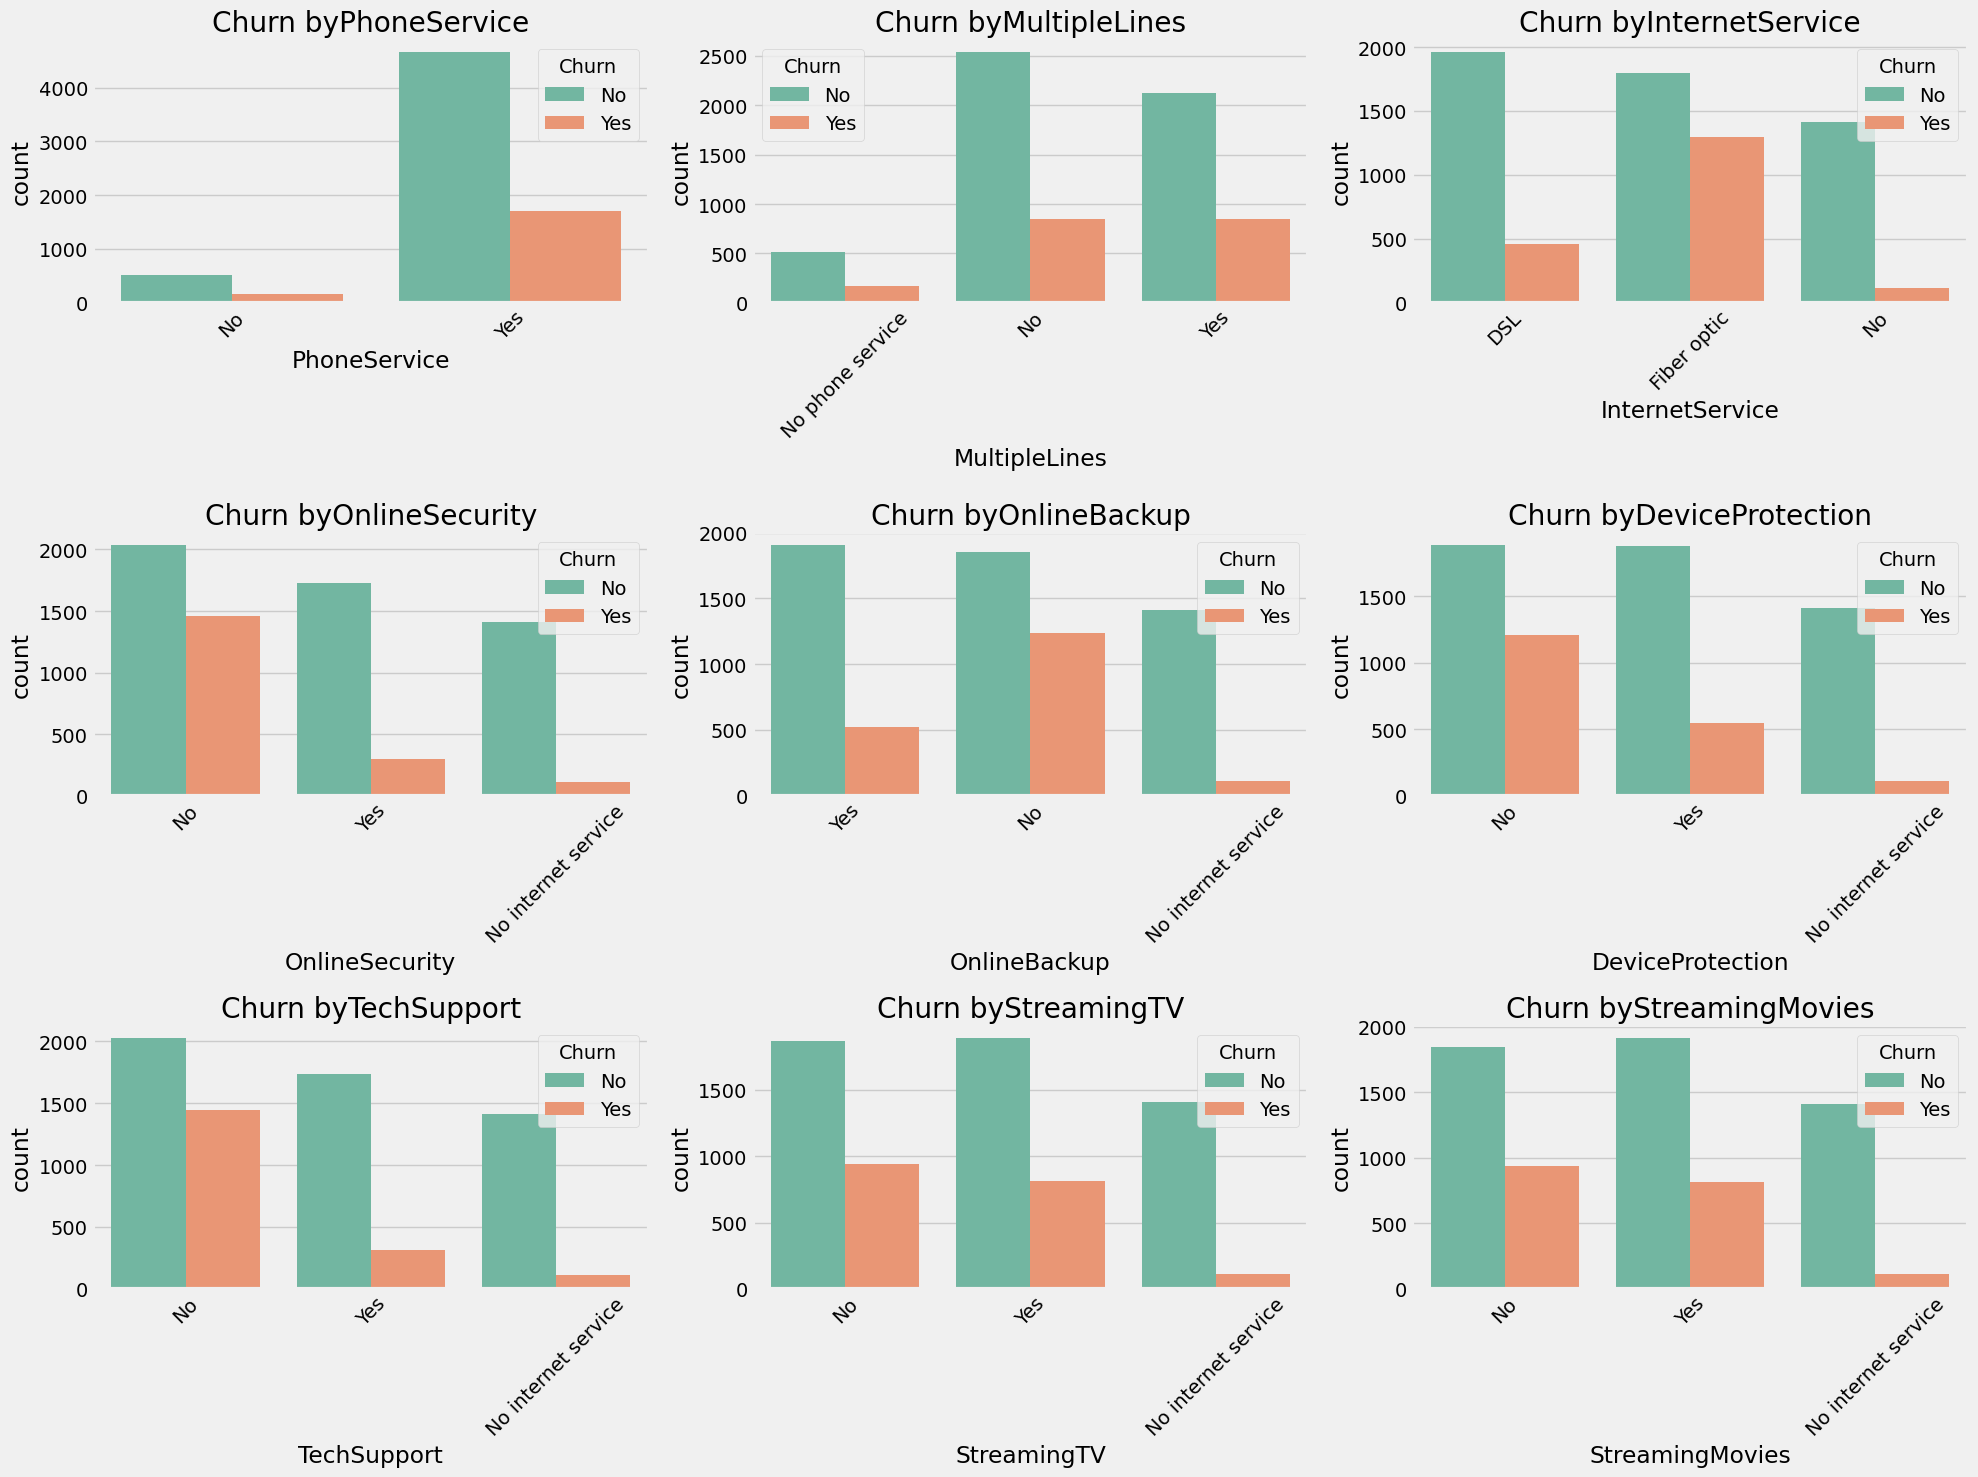

In [70]:
#Service Analysis 

services=['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
            'StreamingMovies']

plt.figure(figsize=(20, 15))
for i, service in enumerate(services, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=service, hue='Churn', data=df)
    plt.title(f"Churn by{service}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

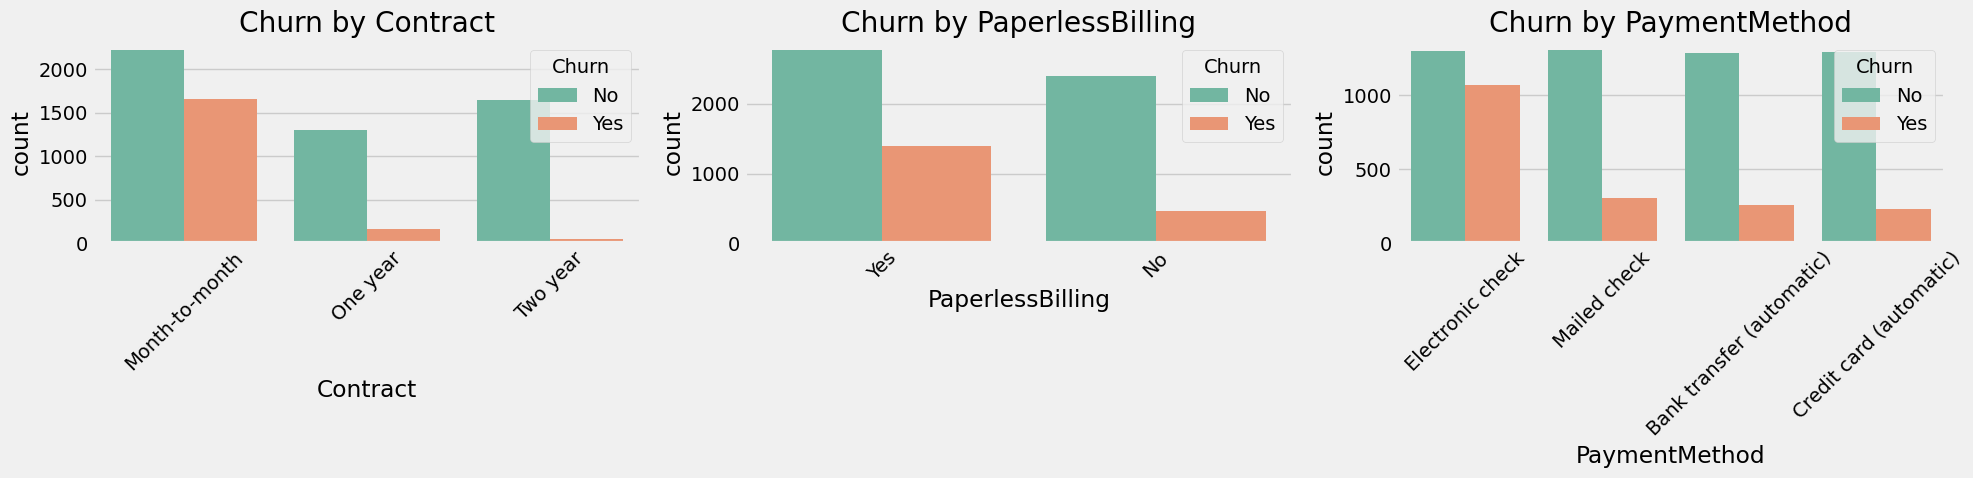

In [71]:
# Contract and payment analysis
payment_vars = ['Contract', 'PaperlessBilling', 'PaymentMethod']

plt.figure(figsize=(20, 5))
for i, var in enumerate(payment_vars, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=var, hue='Churn', data=df)
    plt.title(f'Churn by {var}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



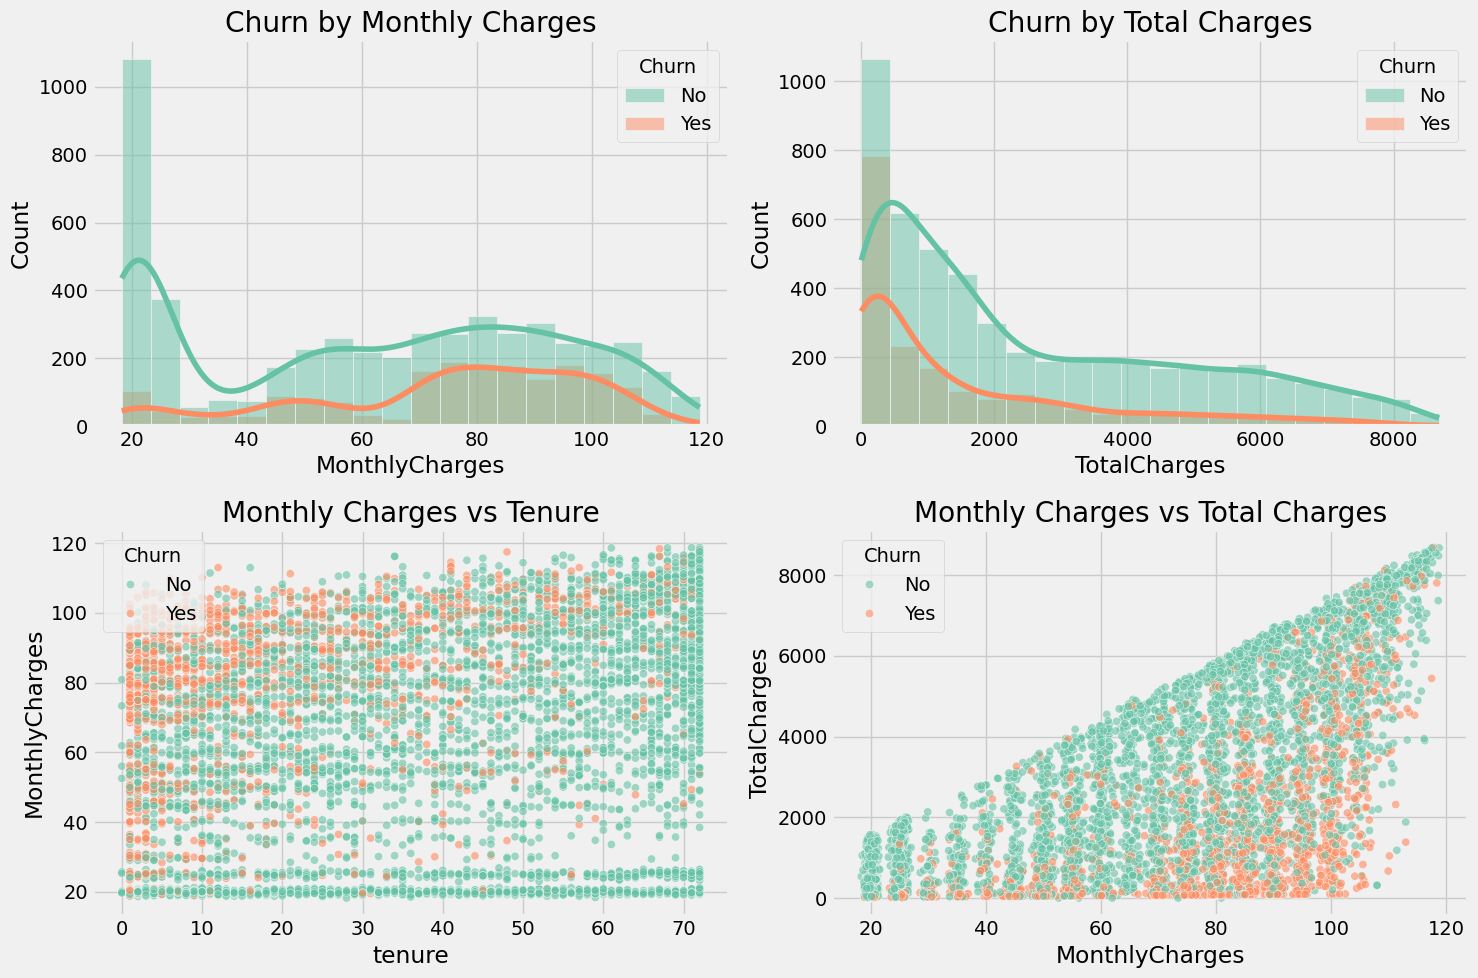

In [72]:
# Financial analysis
plt.figure(figsize=(15, 10))
# Monthly charges
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', bins=20, kde=True)
plt.title('Churn by Monthly Charges')

# Total charges
plt.subplot(2, 2, 2)
sns.histplot(data=df, x='TotalCharges', hue='Churn', bins=20, kde=True)
plt.title('Churn by Total Charges')

# Monthly charges vs tenure with churn
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn', alpha=0.6)
plt.title('Monthly Charges vs Tenure')

# Monthly charges vs total charges with churn
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn', alpha=0.6)
plt.title('Monthly Charges vs Total Charges')

plt.tight_layout()
plt.show()

### 3.4 Correlation Analysis

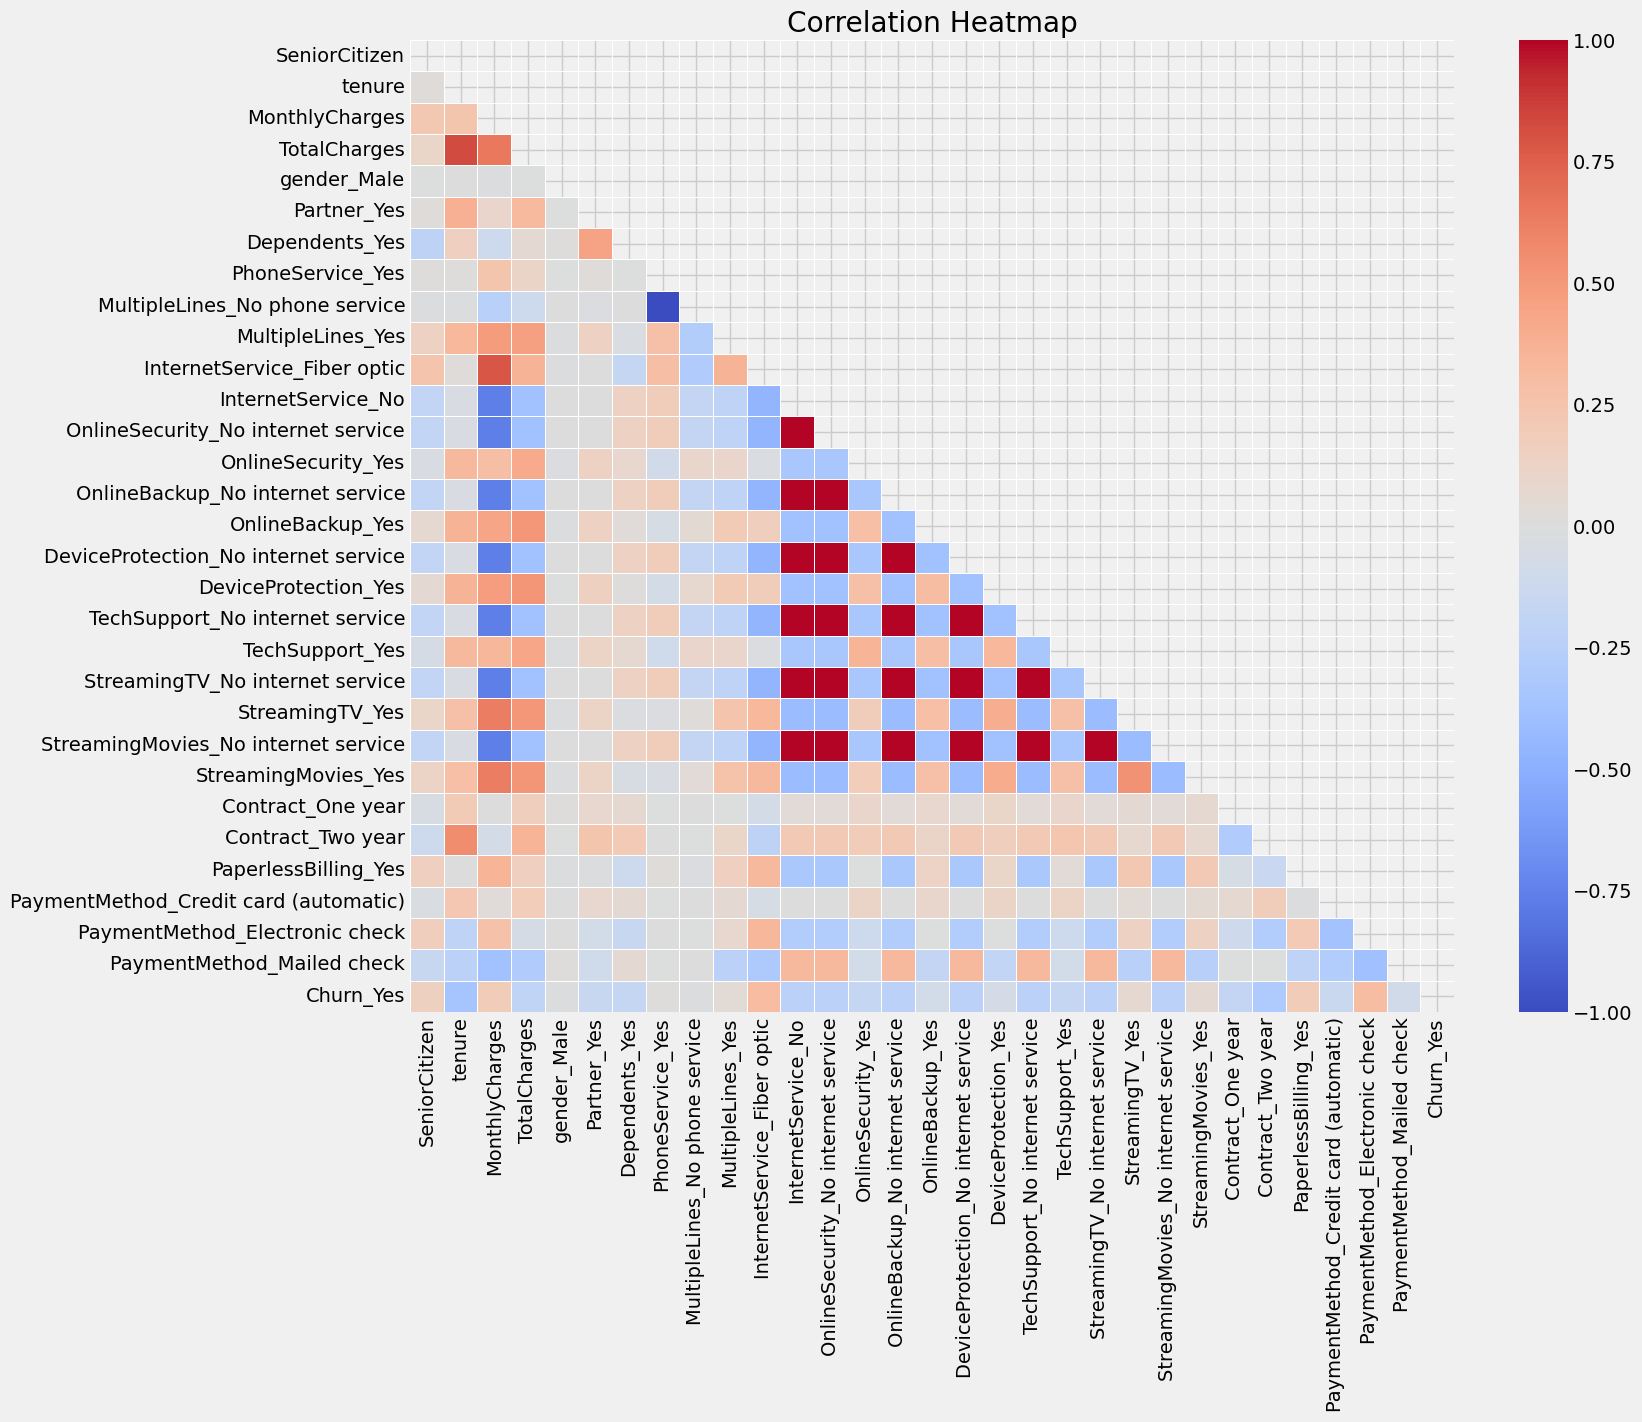

In [74]:
df_encoded =pd.get_dummies(df.drop(['customerID'],axis=1),drop_first=True)

#calculate Correlation

corr=df_encoded.corr()

plt.figure(figsize=(15, 12))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [75]:
churn_correlations=corr['Churn_Yes'].sort_values(ascending=False)

In [76]:
churn_correlations


Churn_Yes                                1.000000
InternetService_Fiber optic              0.308020
PaymentMethod_Electronic check           0.301919
MonthlyCharges                           0.193356
PaperlessBilling_Yes                     0.191825
SeniorCitizen                            0.150889
StreamingTV_Yes                          0.063228
StreamingMovies_Yes                      0.061382
MultipleLines_Yes                        0.040102
PhoneService_Yes                         0.011942
gender_Male                             -0.008612
MultipleLines_No phone service          -0.011942
DeviceProtection_Yes                    -0.066160
OnlineBackup_Yes                        -0.082255
PaymentMethod_Mailed check              -0.091683
PaymentMethod_Credit card (automatic)   -0.134302
Partner_Yes                             -0.150448
Dependents_Yes                          -0.164221
TechSupport_Yes                         -0.164674
OnlineSecurity_Yes                      -0.171226


### 3.5 Key Insights from EDA

Based on our exploratory analysis, several key patterns emerge:

1. **Contract Type**: Month-to-month contract customers churn at a much higher rate than those with longer-term contracts.

2. **Tenure**: Customers with shorter tenure are more likely to churn.

3. **Services**: Customers without online security, tech support, and device protection have higher churn rates.

4. **Internet Service**: Fiber optic customers have higher churn rates despite the premium service.

5. **Payment Method**: Electronic check users show higher churn rates compared to other payment methods.

6. **Demographics**: Senior citizens have slightly higher churn rates, while customers with partners and dependents tend to be more loyal.

7. **Billing**: Customers with higher monthly charges and paperless billing show higher churn tendencies.



## 4. Feature Engineering & Data Preprocessing

### 4.1 Feature Engineering

In [79]:
df.head()


customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [81]:
# Create new features 
service_cols =['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

df[service_cols]=df[service_cols].replace({'Yes':1, 'No':0,'No internet service': 0, 'No phone service': 0})

df['ServiceCount']=df[service_cols].sum(axis=1)

df['MonthlyChargesPerService']=df['MonthlyCharges']/df['ServiceCount'].replace(0,1) #Avoid divide by 0 




In [82]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure  PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1             0   
1  5575-GNVDE    Male              0      No         No      34             1   
2  3668-QPYBK    Male              0      No         No       2             1   
3  7795-CFOCW    Male              0      No         No      45             0   
4  9237-HQITU  Female              0      No         No       2             1   

   MultipleLines InternetService  OnlineSecurity  OnlineBackup  \
0              0             DSL               0             1   
1              0             DSL               1             0   
2              0             DSL               1             1   
3              0             DSL               1             0   
4              0     Fiber optic               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0                 0            0            0                0   
1                 1            0            0                0   
2                 0            0            0                0   
3                 1            1            0                0   
4                 0            0            0                0   

         Contract PaperlessBilling              PaymentMethod  MonthlyCharges  \
0  Month-to-month              Yes           Electronic check           29.85   
1        One year               No               Mailed check           56.95   
2  Month-to-month              Yes               Mailed check           53.85   
3        One year               No  Bank transfer (automatic)           42.30   
4  Month-to-month              Yes           Electronic check           70.70   

   TotalCharges Churn  ServiceCount  MonthlyChargesPerService  
0         29.85    No             1                 29.850000  
1       1889.50    No             3                 18.983333  
2        108.15   Yes             3                 17.950000  
3       1840.75    No             3                 14.100000  
4        151.65   Yes             1                 70.700000

In [83]:
df['AvgMonthlyCharges']=df['TotalCharges']/df['tenure']

In [84]:
df['ChargeEvolution']=df['MonthlyCharges']-df['AvgMonthlyCharges']

In [85]:
df[['MonthlyCharges','TotalCharges','tenure', 'ServiceCount', 'MonthlyChargesPerService','ChargeEvolution']].head(10)


MonthlyCharges  TotalCharges  tenure  ServiceCount  \
0           29.85         29.85       1             1   
1           56.95       1889.50      34             3   
2           53.85        108.15       2             3   
3           42.30       1840.75      45             3   
4           70.70        151.65       2             1   
5           99.65        820.50       8             5   
6           89.10       1949.40      22             4   
7           29.75        301.90      10             1   
8          104.80       3046.05      28             6   
9           56.15       3487.95      62             3   

   MonthlyChargesPerService  ChargeEvolution  
0                 29.850000         0.000000  
1                 18.983333         1.376471  
2                 17.950000        -0.225000  
3                 14.100000         1.394444  
4                 70.700000        -5.125000  
5                 19.930000        -2.912500  
6                 22.275000         0.490909  
7                 29.750000        -0.440000  
8                 17.466667        -3.987500  
9                 18.716667        -0.107258

In [86]:
df['ContractValue']=df['Contract'].map({'Month-to-month':0,'One year':1,'Two year':2})

df['FamilyStatus']=df.apply(lambda x : 'Single' if (x['Partner']=='No' and x['Dependents']=='No')else
                            'Partner Only' if(x['Partner']=='Yes' and x['Dependents']=='No')else
                            'Depedents Only' if (x['Partner']=='No' and x['Dependents']=='Yes')else 'Family',
                            axis=1)

In [87]:
df[['ContractValue', 'FamilyStatus']]

ContractValue  FamilyStatus
0                 0  Partner Only
1                 1        Single
2                 0        Single
3                 1        Single
4                 0        Single
...             ...           ...
7038              1        Family
7039              1        Family
7040              0        Family
7041              0  Partner Only
7042              2        Single

[7043 rows x 2 columns]

In [88]:
df['CustomerSegment']='Low Value'
df.loc[
    (df['tenure']>12)&
    (df['MonthlyCharges']> df['MonthlyCharges'].median()),
    'CustomerSegment']='Mid Value'
df.loc[
    (df['tenure']>40)&
    (df['MonthlyCharges']>df['MonthlyCharges'].quantile(0.75)),
    'CustomerSegment']='High Value'

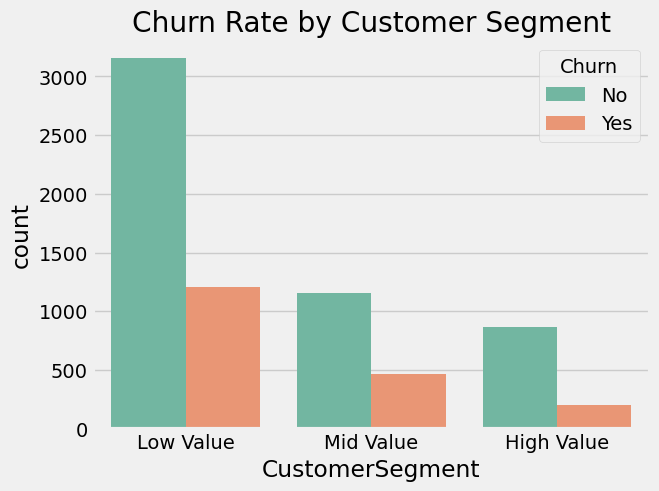

In [89]:
sns.countplot(x='CustomerSegment', hue='Churn', data=df)
plt.title("Churn Rate by Customer Segment")
plt.show()


### 4.2 Data Preparation for Modeling

In [95]:
# Binary categorical columns to label encode (map Yes/No to 1/0)
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService',
               'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
               'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# Define non-binary categorical and numeric columns
non_binary_cols = ['InternetService', 'Contract', 'PaymentMethod', 'CustomerSegment', 'FamilyStatus']
num_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 
            'AvgMonthlyCharges', 'MonthlyChargesPerService', 
            'ServiceCount', 'ContractValue', 'ChargeEvolution']

# Recreate X and y after mapping
X = df.drop("Churn", axis=1)
y = df["Churn"]

df = df.drop('customerID', axis=1)

# Convert target variable to binary
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Split features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Define numerical preprocessing
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define one-hot encoding for non-binary categoricals
non_binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine everything in a ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_cols),
    ('cat_non_binary', non_binary_transformer, non_binary_cols),
    ('cat_binary', 'passthrough', binary_cols)  # Already encoded as 0/1
])



In [92]:
df[['SeniorCitizen','PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']]

SeniorCitizen  PhoneService  MultipleLines  OnlineSecurity  \
0                 0           NaN            NaN             NaN   
1                 0           NaN            NaN             NaN   
2                 0           NaN            NaN             NaN   
3                 0           NaN            NaN             NaN   
4                 0           NaN            NaN             NaN   
...             ...           ...            ...             ...   
7038              0           NaN            NaN             NaN   
7039              0           NaN            NaN             NaN   
7040              0           NaN            NaN             NaN   
7041              1           NaN            NaN             NaN   
7042              0           NaN            NaN             NaN   

      OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
0              NaN               NaN          NaN          NaN   
1              NaN               NaN          NaN          NaN   
2              NaN               NaN          NaN          NaN   
3              NaN               NaN          NaN          NaN   
4              NaN               NaN          NaN          NaN   
...            ...               ...          ...          ...   
7038           NaN               NaN          NaN          NaN   
7039           NaN               NaN          NaN          NaN   
7040           NaN               NaN          NaN          NaN   
7041           NaN               NaN          NaN          NaN   
7042           NaN               NaN          NaN          NaN   

      StreamingMovies  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  
...               ...  
7038              NaN  
7039              NaN  
7040              NaN  
7041              NaN  
7042              NaN  

[7043 rows x 9 columns]

In [93]:
df[['gender',
 'Partner',
 'Dependents',
 'InternetService',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'FamilyStatus',
 'CustomerSegment']]

gender  Partner  Dependents InternetService        Contract  \
0        NaN        1           0             DSL  Month-to-month   
1        NaN        0           0             DSL        One year   
2        NaN        0           0             DSL  Month-to-month   
3        NaN        0           0             DSL        One year   
4        NaN        0           0     Fiber optic  Month-to-month   
...      ...      ...         ...             ...             ...   
7038     NaN        1           1             DSL        One year   
7039     NaN        1           1     Fiber optic        One year   
7040     NaN        1           1             DSL  Month-to-month   
7041     NaN        1           0     Fiber optic  Month-to-month   
7042     NaN        0           0     Fiber optic        Two year   

      PaperlessBilling              PaymentMethod  FamilyStatus  \
0                    1           Electronic check  Partner Only   
1                    0               Mailed check        Single   
2                    1               Mailed check        Single   
3                    0  Bank transfer (automatic)        Single   
4                    1           Electronic check        Single   
...                ...                        ...           ...   
7038                 1               Mailed check        Family   
7039                 1    Credit card (automatic)        Family   
7040                 1           Electronic check        Family   
7041                 1               Mailed check  Partner Only   
7042                 1  Bank transfer (automatic)        Single   

     CustomerSegment  
0          Low Value  
1          Low Value  
2          Low Value  
3          Low Value  
4          Low Value  
...              ...  
7038       Mid Value  
7039      High Value  
7040       Low Value  
7041       Low Value  
7042      High Value  

[7043 rows x 9 columns]

In [97]:
# Setup preprocessing pipeline

# Define binary columns explicitly to treat them as categorical
binary_cols = ['SeniorCitizen', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 
               'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Define non-binary categorical columns (the rest of the categorical features)
non_binary_cat_cols = ['gender', 'Partner', 'Dependents', 'InternetService', 
                       'Contract', 'PaperlessBilling', 'PaymentMethod', 
                       'FamilyStatus', 'CustomerSegment']

# Define numerical columns
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'ServiceCount', 'MonthlyChargesPerService',
            'AvgMonthlyCharges', 'ChargeEvolution', 'ContractValue']  # These are your numerical columns

# Set up transformers for both numerical and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing values with median for numerical features
    ('scaler', StandardScaler())  # Standardize numerical features
])

# Categorical transformer for binary columns (0/1 encoded) and non-binary categorical columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # One-hot encode categorical features
])

# Combine preprocessing steps for both numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat_binary', categorical_transformer, binary_cols),  # Process binary columns as categorical
        ('cat_non_binary', categorical_transformer, non_binary_cat_cols)  # Process other categorical columns
    ])

# Check for class imbalance in training set
print(f"Class distribution in training set: {y_train.value_counts(normalize=True)}")


Class distribution in training set: Churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64


In [99]:
smote = SMOTE(random_state=42)

X_train_processed = preprocessor.fit_transform(X_train)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)


print(f"Class distributions after SMOTE:{pd.Series(y_train_resampled).value_counts(normalize=True)} ")

Class distributions after SMOTE:Churn
0    0.5
1    0.5
Name: proportion, dtype: float64 


In [101]:
models = {
    'Random Forest':RandomForestClassifier(random_state=42),
    'Gradient Boosting':GradientBoostingClassifier(random_state=42),
    'XGBoost':xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(random_state=42)
}

In [102]:
def evaluate_models(models, X, y, cv=5):
    results={}
    for name, model in models.items():
        cv_scores=cross_val_score(model, X, y, cv=cv, scoring='roc_auc')
        results[name]={
              'Mean ROC AUC': cv_scores.mean(),
              'Std ROC AUC': cv_scores.std()
        }

        print(f"{name}: Mean ROC AUC = {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
    return results

model_results=evaluate_models(models, X_train_resampled, y_train_resampled)

#Identifying the best Performing Model 
best_model_name=max(model_results.items(),key=lambda x:x[1] ['Mean ROC AUC'])[0]
print(f"\n Best Performing model:{best_model_name}")
        

Random Forest: Mean ROC AUC = 0.9192 (±0.0225)
Gradient Boosting: Mean ROC AUC = 0.8933 (±0.0272)
XGBoost: Mean ROC AUC = 0.9200 (±0.0405)
[LightGBM] [Info] Number of positive: 3311, number of negative: 3311
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001200 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2439
[LightGBM] [Info] Number of data points in the train set: 6622, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 3311, number of negative: 3311
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000438 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2398
[LightGBM] [Info] Number of data


### 5.2 Hyperparameter Tuning

In [104]:
if best_model_name == 'XGBoost':
    param_grid = {
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7],
        'n_estimators': [100, 200, 300],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0],
        'gamma': [0, 0.1, 0.2]
    }
    
    model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
    
elif best_model_name == 'LightGBM':
    param_grid = {
        'learning_rate': [0.01, 0.05, 0.1],
        'num_leaves': [31, 50, 70],
        'max_depth': [3, 5, 7],
        'n_estimators': [100, 200, 300],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0]
    }
    
    model = LGBMClassifier(random_state=42)
    
elif best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    }
    
    model = RandomForestClassifier(random_state=42)
    
else:  # Gradient Boosting
    param_grid = {
        'learning_rate': [0.01, 0.05, 0.1],
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'subsample': [0.8, 0.9, 1.0]
    }
    
    model = GradientBoostingClassifier(random_state=42)

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_resampled, y_train_resampled)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")


Fitting 5 folds for each of 729 candidates, totalling 3645 fits


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [07:52:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [07:52:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [07:52:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [07:52:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

Best parameters: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.9}
Best cross-validation score: 0.9247


In [105]:
final_model = grid_search.best_estimator_

In [106]:
final_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=0.1,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

### 5.3 Final Model Training and Evaluationf

In [108]:
# Train the final model on the resampled training data
final_model.fit(X_train_resampled, y_train_resampled)

# Process test data
X_test_processed = preprocessor.transform(X_test)

# Predictions
y_pred = final_model.predict(X_test_processed)
y_pred_proba = final_model.predict_proba(X_test_processed)[:, 1]


# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

In [109]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7779
Precision: 0.5761
Recall: 0.6176
F1 Score: 0.5961
ROC AUC Score: 0.8206

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1035
           1       0.58      0.62      0.60       374

    accuracy                           0.78      1409
   macro avg       0.72      0.73      0.72      1409
weighted avg       0.78      0.78      0.78      1409



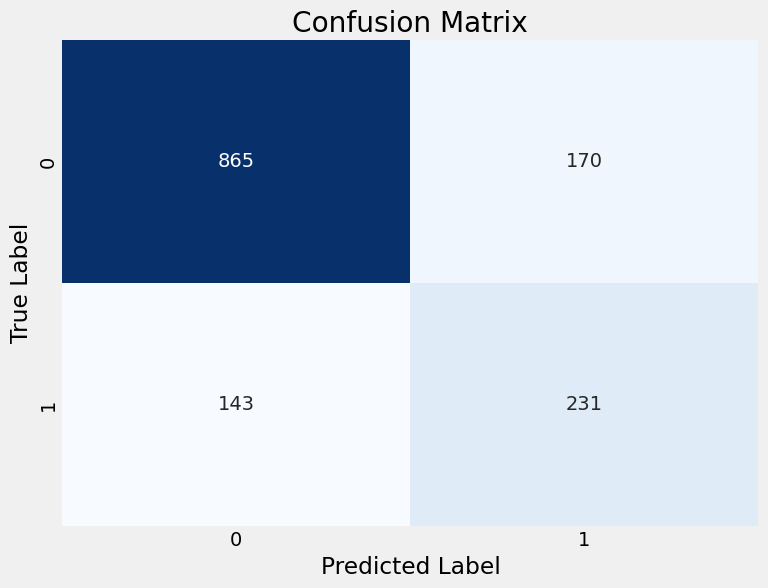

In [110]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


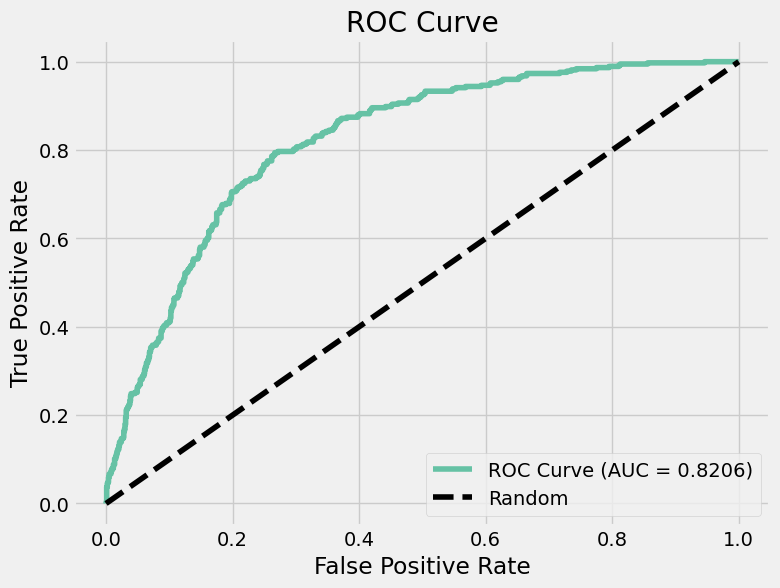

In [111]:
# ROC Curve
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

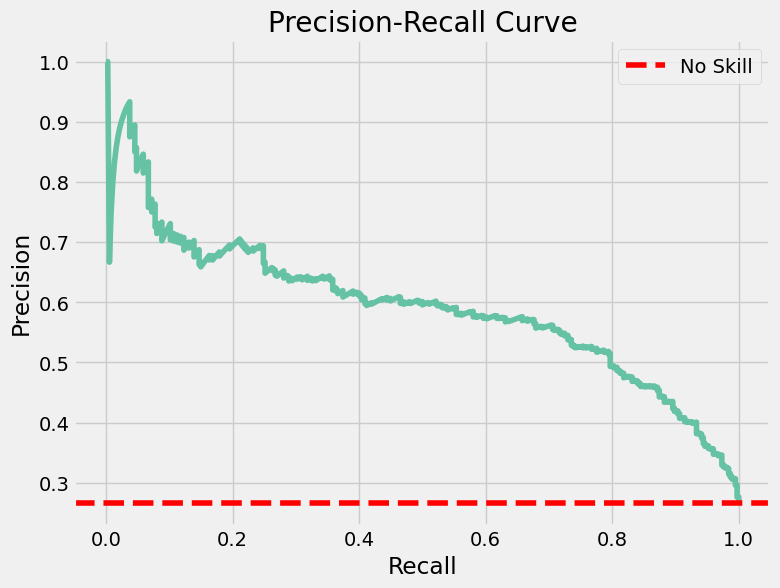

In [112]:
# Precision-Recall Curve
plt.figure(figsize=(8, 6))
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall_curve, precision_curve)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.axhline(y=sum(y_test)/len(y_test), color='r', linestyle='--', label='No Skill')
plt.legend()
plt.show()

## 6. Feature Importance and Model Interpretation

### 6.1 Feature Importance Analysis

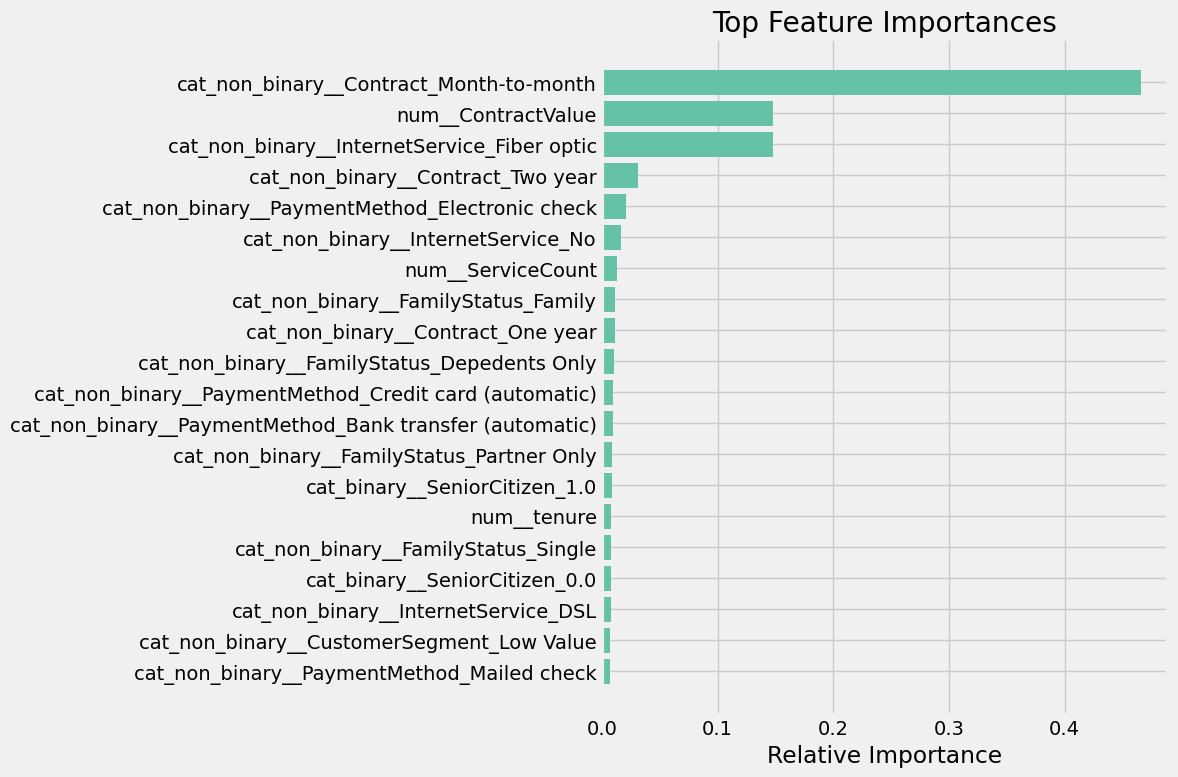


Top 20 Most Important Features:
1. cat_non_binary__Contract_Month-to-month: 0.4661
2. num__ContractValue: 0.1479
3. cat_non_binary__InternetService_Fiber optic: 0.1478
4. cat_non_binary__Contract_Two year: 0.0314
5. cat_non_binary__PaymentMethod_Electronic check: 0.0212
6. cat_non_binary__InternetService_No: 0.0167
7. num__ServiceCount: 0.0129
8. cat_non_binary__FamilyStatus_Family: 0.0116
9. cat_non_binary__Contract_One year: 0.0112
10. cat_non_binary__FamilyStatus_Depedents Only: 0.0107
11. cat_non_binary__PaymentMethod_Credit card (automatic): 0.0095
12. cat_non_binary__PaymentMethod_Bank transfer (automatic): 0.0095
13. cat_non_binary__FamilyStatus_Partner Only: 0.0092
14. cat_binary__SeniorCitizen_1.0: 0.0089
15. num__tenure: 0.0082
16. cat_non_binary__FamilyStatus_Single: 0.0080
17. cat_binary__SeniorCitizen_0.0: 0.0077
18. cat_non_binary__InternetService_DSL: 0.0076
19. cat_non_binary__CustomerSegment_Low Value: 0.0070
20. cat_non_binary__PaymentMethod_Mailed check: 0.0069


In [115]:
# Extract feature names from preprocessor
try:
    feature_names = preprocessor.get_feature_names_out()
except:
    # Fallback for older sklearn or complex pipelines
    feature_names = [f"feature_{i}" for i in range(X_train_resampled.shape[1])]
if best_model_name in ['XGBoost', 'LightGBM', 'Random Forest', 'Gradient Boosting']:
    importances = final_model.feature_importances_

    
    if len(feature_names) != len(importances):
        print(f"\n⚠️ Mismatch Detected: {len(feature_names)} features vs {len(importances)} importances")
        print("Fixing using shape of X_train_resampled...")
        # In case preprocessor has transformers marked as 'drop', use final transformed shape
        feature_names = [f'feature_{i}' for i in range(X_train_resampled.shape[1])]

    # Step 3: Sort and plot top N
    indices = np.argsort(importances)[::-1]
    top_n = min(20, len(importances))

    plt.figure(figsize=(12, 8))
    plt.title('Top Feature Importances')
    plt.barh(range(top_n), importances[indices[:top_n]], align='center')
    plt.yticks(range(top_n), [feature_names[i] for i in indices[:top_n]])
    plt.xlabel('Relative Importance')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

    # Step 4: Print top features
    print("\nTop 20 Most Important Features:")
    for i in range(top_n):
        print(f"{i+1}. {feature_names[indices[i]]}: {importances[indices[i]]:.4f}")

else:
    print("Model does not support feature_importances_ attribute.")

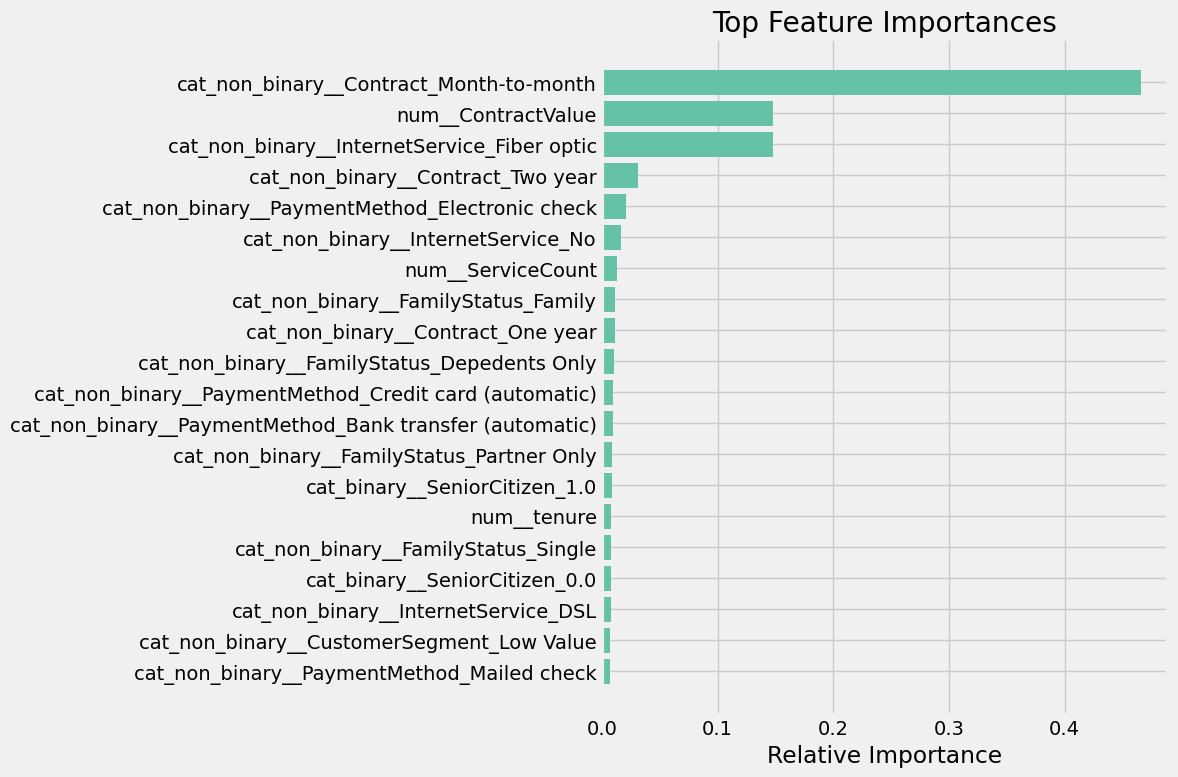


Top 20 Most Important Features:
1. cat_non_binary__Contract_Month-to-month: 0.4661
2. num__ContractValue: 0.1479
3. cat_non_binary__InternetService_Fiber optic: 0.1478
4. cat_non_binary__Contract_Two year: 0.0314
5. cat_non_binary__PaymentMethod_Electronic check: 0.0212
6. cat_non_binary__InternetService_No: 0.0167
7. num__ServiceCount: 0.0129
8. cat_non_binary__FamilyStatus_Family: 0.0116
9. cat_non_binary__Contract_One year: 0.0112
10. cat_non_binary__FamilyStatus_Depedents Only: 0.0107
11. cat_non_binary__PaymentMethod_Credit card (automatic): 0.0095
12. cat_non_binary__PaymentMethod_Bank transfer (automatic): 0.0095
13. cat_non_binary__FamilyStatus_Partner Only: 0.0092
14. cat_binary__SeniorCitizen_1.0: 0.0089
15. num__tenure: 0.0082
16. cat_non_binary__FamilyStatus_Single: 0.0080
17. cat_binary__SeniorCitizen_0.0: 0.0077
18. cat_non_binary__InternetService_DSL: 0.0076
19. cat_non_binary__CustomerSegment_Low Value: 0.0070
20. cat_non_binary__PaymentMethod_Mailed check: 0.0069


In [117]:
try:
    feature_names = preprocessor.get_feature_names_out()
except:
    # fallback for older sklearn versions
    feature_names = [f"feature_{i}" for i in range(X_train_resampled.shape[1])]

# Step 3: Get feature importances from tree-based model
if hasattr(final_model, "feature_importances_"):
    importances = final_model.feature_importances_

    # Step 4: Confirm shape match
    if len(feature_names) != len(importances):
        print(f"\n Mismatch: {len(feature_names)} features vs {len(importances)} importances")
        feature_names = [f"feature_{i}" for i in range(len(importances))]  # fallback

    # Step 5: Sort and plot
    indices = np.argsort(importances)[::-1]
    top_n = min(20, len(importances))

    plt.figure(figsize=(12, 8))
    plt.title('Top Feature Importances')
    plt.barh(range(top_n), importances[indices[:top_n]], align='center')
    plt.yticks(range(top_n), [feature_names[i] for i in indices[:top_n]])
    plt.xlabel('Relative Importance')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

    # Step 6: Print top features
    print("\nTop 20 Most Important Features:")
    for i in range(top_n):
        print(f"{i+1}. {feature_names[indices[i]]}: {importances[indices[i]]:.4f}")

else:
    print(" Model does not support feature_importances_ (not a tree-based model).")

In [119]:
total = importances.sum()
for i in range(top_n):
    print(f"{i+1}. {feature_names[indices[i]]}: {(importances[indices[i]]/total)*100:.2f}%")



1. cat_non_binary__Contract_Month-to-month: 46.61%
2. num__ContractValue: 14.79%
3. cat_non_binary__InternetService_Fiber optic: 14.78%
4. cat_non_binary__Contract_Two year: 3.14%
5. cat_non_binary__PaymentMethod_Electronic check: 2.12%
6. cat_non_binary__InternetService_No: 1.67%
7. num__ServiceCount: 1.29%
8. cat_non_binary__FamilyStatus_Family: 1.16%
9. cat_non_binary__Contract_One year: 1.12%
10. cat_non_binary__FamilyStatus_Depedents Only: 1.07%
11. cat_non_binary__PaymentMethod_Credit card (automatic): 0.95%
12. cat_non_binary__PaymentMethod_Bank transfer (automatic): 0.95%
13. cat_non_binary__FamilyStatus_Partner Only: 0.92%
14. cat_binary__SeniorCitizen_1.0: 0.89%
15. num__tenure: 0.82%
16. cat_non_binary__FamilyStatus_Single: 0.80%
17. cat_binary__SeniorCitizen_0.0: 0.77%
18. cat_non_binary__InternetService_DSL: 0.76%
19. cat_non_binary__CustomerSegment_Low Value: 0.70%
20. cat_non_binary__PaymentMethod_Mailed check: 0.69%


### 6.2 SHAP Analysis for Model Interpretation

In [124]:
# SHAP analysis for model interpretation
explainer = shap.Explainer(final_model, X_train_resampled)
shap_values = explainer(X_test_processed)


100%|===================| 1407/1409 [00:14<00:00]        

In [126]:
shap_values

.values =
array([[-1.56148971, -0.01734038, -0.13037302, ..., -0.13774064,
        -0.04250468,  0.03118832],
       [ 0.79012795,  0.39958092,  0.17564542, ...,  0.01568079,
         0.01055454,  0.04746579],
       [-0.41080987,  0.03043012,  0.07202915, ...,  0.03647483,
        -0.04172401,  0.11574518],
       ...,
       [ 0.47880035, -0.13262632, -0.09149838, ...,  0.04725991,
         0.02070258,  0.01241774],
       [-0.24054626,  0.02634188,  0.47153125, ...,  0.01356796,
         0.03987776,  0.01165581],
       [-2.32140217, -0.26269843,  0.62983736, ..., -0.00511496,
        -0.10942098,  0.02971601]])

.base_values =
array([0.35844301, 0.35844301, 0.35844301, ..., 0.35844301, 0.35844301,
       0.35844301])

.data =
array([[ 1.60848343,  1.62997635,  2.70682752, ...,  1.        ,
         0.        ,  0.        ],
       [-0.9966836 ,  1.16872526, -0.61026041, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.34660565,  0.44532428,  0.40011607, ...,  0.     

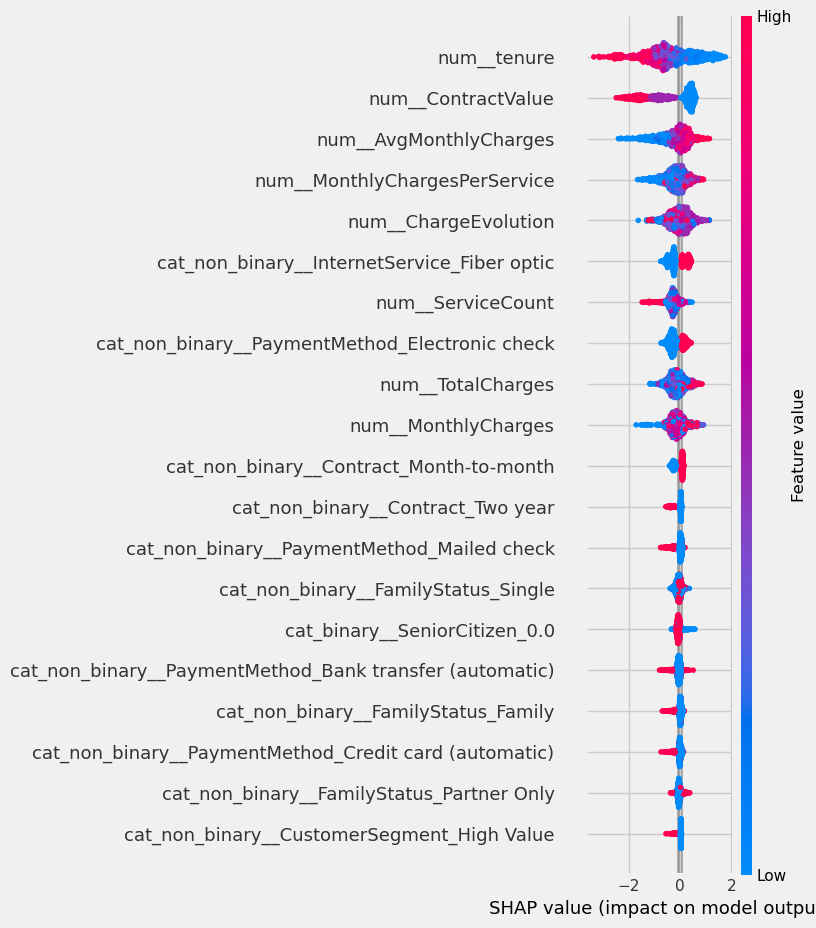

<Figure size 640x480 with 0 Axes>

In [128]:
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_processed, feature_names=feature_names, max_display=20)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

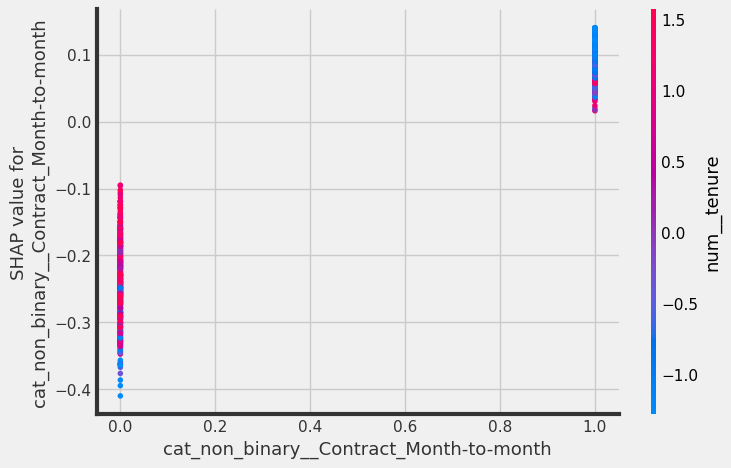

<Figure size 640x480 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

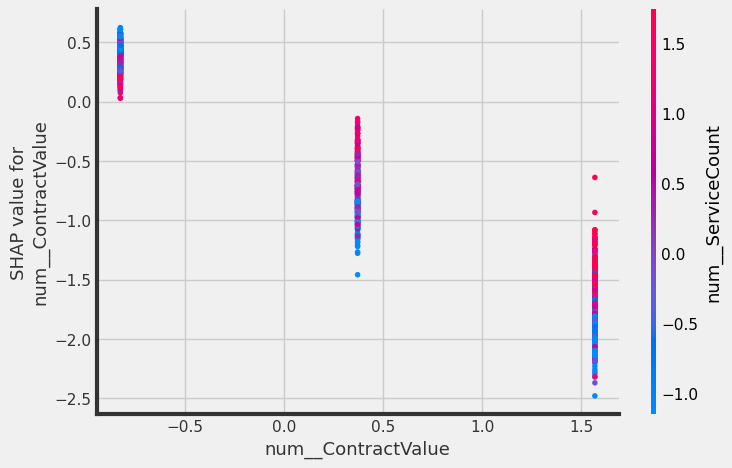

<Figure size 640x480 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

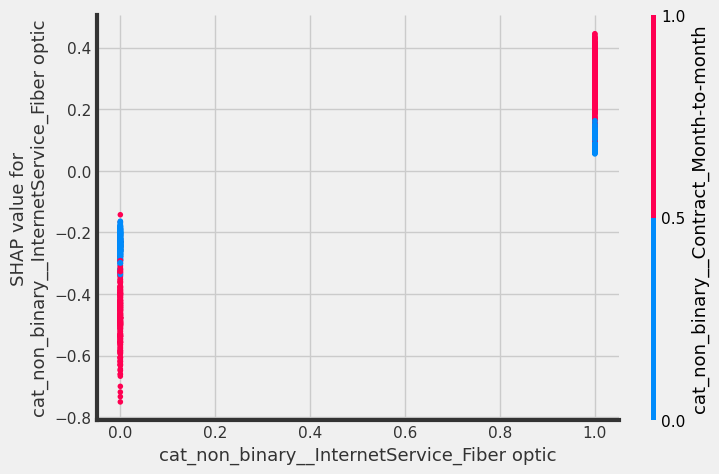

<Figure size 640x480 with 0 Axes>

In [132]:


# Make sure feature_names is a list
feature_names = feature_names.tolist()

# Pick top N features based on SHAP importance
top_features = [feature_names[indices[i]] for i in range(min(3, len(indices)))]

# Dependence plots for top features
for feature in top_features:
    plt.figure(figsize=(10, 6))
    feature_idx = feature_names.index(feature)
    shap.dependence_plot(feature_idx, shap_values.values, X_test_processed, feature_names=feature_names)
    plt.tight_layout()
    plt.show()plt.figure(figsize=(20, 6))
shap.initjs()
shap.force_plot(explainer.expected_value, 
                shap_values.values[:5,:], 
                X_test_processed[:5,:], 
                feature_names=feature_names)
```


In [134]:
#For a sample set of customers 
plt.figure(figsize=(20, 6))
shap.initjs()
shap.force_plot(explainer.expected_value, 
                shap_values.values[:5,:], 
                X_test_processed[:5,:], 
                feature_names=feature_names)


<Figure size 2000x600 with 0 Axes>

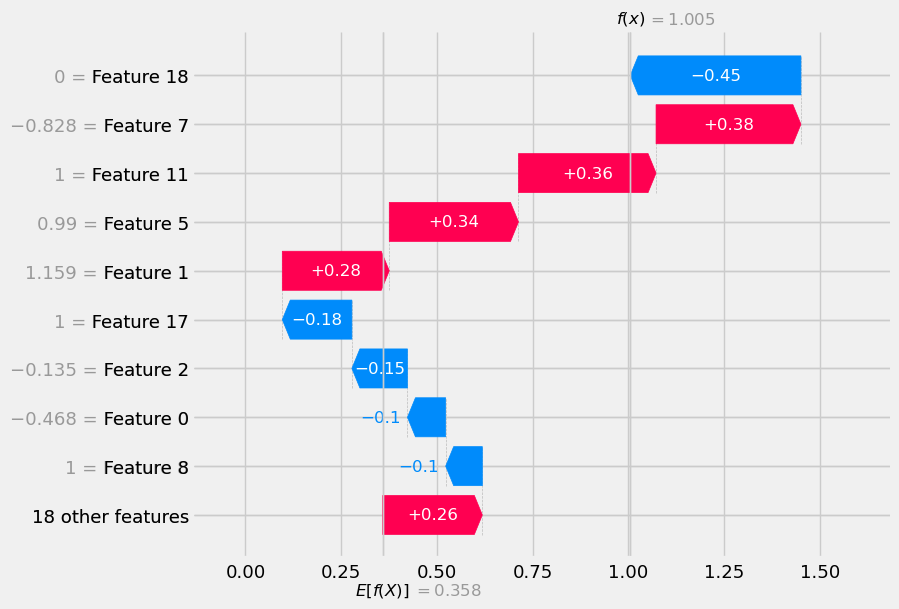

In [136]:
shap.plots.waterfall(shap_values[5])  # or any specific index


In [144]:
# Convert to pandas Series to assign custom names temporarily
sample_idx = 5
shap_val = shap_values[sample_idx]
shap_df = pd.DataFrame({
    'feature': feature_names,
    'shap': shap_val.values,
    'value': shap_val.data
}).sort_values(by='shap', key=abs, ascending=False)

# Display top N
shap_df.head(15)



feature      shap     value
18     cat_non_binary__PaymentMethod_Electronic check -0.445667  0.000000
7                                  num__ContractValue  0.378357 -0.827774
11        cat_non_binary__InternetService_Fiber optic  0.359264  1.000000
5                              num__AvgMonthlyCharges  0.337472  0.990179
1                                 num__MonthlyCharges  0.279378  1.158770
17  cat_non_binary__PaymentMethod_Credit card (aut... -0.181751  1.000000
2                                   num__TotalCharges -0.145116 -0.134614
0                                         num__tenure -0.099819 -0.467509
8                       cat_binary__SeniorCitizen_0.0 -0.095724  1.000000
3                                   num__ServiceCount  0.093469  0.780784
23                cat_non_binary__FamilyStatus_Single  0.087622  1.000000
13            cat_non_binary__Contract_Month-to-month  0.073781  1.000000
26          cat_non_binary__CustomerSegment_Mid Value -0.065058  1.000000
25          cat_non_binary__CustomerSegment_Low Value -0.059095  0.000000
6                                num__ChargeEvolution  0.051952  1.914613


### 6.3 Business Insights from Model

Based on our model analysis, here are the key business insights:

1. **Contract Type**: The most influential factor in churn prediction is contract type, with month-to-month contracts having the highest churn risk.

2. **Fiber Optic Service**: Despite being a premium service, fiber optic internet is associated with higher churn rates, suggesting potential service quality issues.

3. **Tenure Threshold**: There appears to be a critical threshold around 12 months where churn risk significantly decreases.

4. **Billing Method**: Electronic check payments correlate with higher churn, suggesting a potential customer segment with lower engagement.

5. **Price Sensitivity**: Higher monthly charges relative to service count indicate price sensitivity as a churn factor.

6. **Family Status**: Single customers without partners or dependents show higher churn propensity.


## 7. Customer Segmentation and Targeted Recommendations

In [154]:

# Segment customers based on churn probability and value

# Step 1: Predict churn probabilities for all customers
X_all_processed = preprocessor.transform(X)
churn_probabilities = final_model.predict_proba(X_all_processed)[:, 1]

# Step 2: Create a DataFrame with relevant customer details
customer_segments = pd.DataFrame({
    'CustomerID': df.index,
    'ChurnProbability': churn_probabilities,
    'MonthlyCharges': X['MonthlyCharges'],
    'Tenure': X['tenure'],
    'CustomerSegment': X['CustomerSegment']
})

# Step 3: Define churn risk categories using quantile-based binning
customer_segments['ChurnRiskCategory'] = pd.qcut(
    customer_segments['ChurnProbability'], 
    q=[0, 0.3, 0.7, 1.0], 
    labels=['Low Risk', 'Medium Risk', 'High Risk']
)

# Step 4: Combine Customer Segment with Risk Category (fixing dtype issue)
customer_segments['ActionableSegment'] = (
    customer_segments['CustomerSegment'].astype(str) + ' - ' + 
    customer_segments['ChurnRiskCategory'].astype(str)
)

# Step 5: Count customers in each segment
segment_counts = customer_segments['ActionableSegment'].value_counts()
print("\nCustomer Counts by Actionable Segment:")
print(segment_counts)



Customer Counts by Actionable Segment:
ActionableSegment
Low Value - Medium Risk     1558
Low Value - Low Risk        1425
Low Value - High Risk       1375
Mid Value - Medium Risk      710
High Value - Medium Risk     549
Mid Value - High Risk        528
Mid Value - Low Risk         383
High Value - Low Risk        305
High Value - High Risk       210
Name: count, dtype: int64


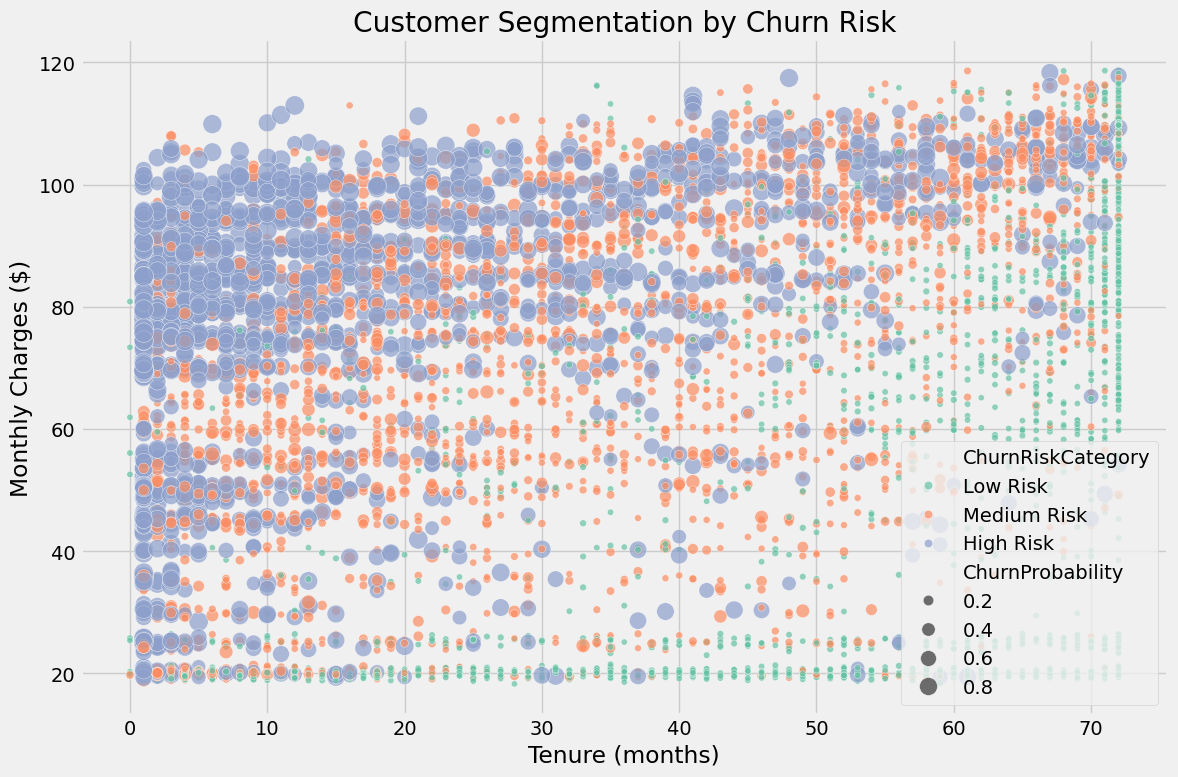

In [156]:
# Visualize segments
plt.figure(figsize=(12, 8))
sns.scatterplot(data=customer_segments, x='Tenure', y='MonthlyCharges', 
                hue='ChurnRiskCategory', size='ChurnProbability',
                sizes=(20, 200), alpha=0.7)
plt.title('Customer Segmentation by Churn Risk')
plt.xlabel('Tenure (months)')
plt.ylabel('Monthly Charges ($)')
plt.tight_layout()
plt.show()


In [158]:

# Recommended actions for each segment
print("\nRecommended Actions for Key Customer Segments:")
print("1. High Value - High Risk:")
print("   - Immediate outreach with personalized retention offers")
print("   - Premium service quality review and improvement")
print("   - Long-term contract incentives with significant discounts")
print("   - Dedicated account manager assignment")

print("\n2. Mid Value - High Risk:")
print("   - Proactive contract renewal offers with moderate discounts")
print("   - Complementary service additions (Security, Backup, Tech Support)")
print("   - Satisfaction surveys to identify specific pain points")
print("   - Alternative payment method recommendations")

print("\n3. Low Value - High Risk:")
print("   - Lower-tier service package offers at competitive rates")
print("   - Digital engagement incentives to increase product stickiness")
print("   - Simplified billing and payment options")
print("   - Basic loyalty rewards program enrollment")

print("\n4. High Value - Medium Risk:")
print("   - Early renewal incentives with modest discounts")
print("   - Family plan upsell opportunities")
print("   - Premium service enhancements")
print("   - Loyalty program tier upgrades")



Recommended Actions for Key Customer Segments:
1. High Value - High Risk:
   - Immediate outreach with personalized retention offers
   - Premium service quality review and improvement
   - Long-term contract incentives with significant discounts
   - Dedicated account manager assignment

2. Mid Value - High Risk:
   - Proactive contract renewal offers with moderate discounts
   - Complementary service additions (Security, Backup, Tech Support)
   - Satisfaction surveys to identify specific pain points
   - Alternative payment method recommendations

3. Low Value - High Risk:
   - Lower-tier service package offers at competitive rates
   - Digital engagement incentives to increase product stickiness
   - Simplified billing and payment options
   - Basic loyalty rewards program enrollment

4. High Value - Medium Risk:
   - Early renewal incentives with modest discounts
   - Family plan upsell opportunities
   - Premium service enhancements
   - Loyalty program tier upgrades


## 8. Model Deployment Strategy

### 8.1 Save the Model Pipeline

In [163]:
from sklearn.pipeline import Pipeline
import pickle

# Define the full pipeline with updated preprocessor and final model
full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),    
    ('classifier', final_model)        
])

# Fit on the original training data (raw X_train, not processed)
full_pipeline.fit(X_train, y_train)

# Save the entire pipeline for reuse or deployment
with open('telco_churn_prediction_model.pkl', 'wb') as file:
    pickle.dump(full_pipeline, file)


## Flask API implementation 

In [ ]:
# from flask import Flask, request, jsonify
# import pandas as pd
# import pickle

# app = Flask(__name__)

# # Load the model
# with open('telco_churn_prediction_model.pkl', 'rb') as file:
#     model = pickle.load(file)

# @app.route('/predict', methods=['POST'])
# def predict():
#     try:
#         # Get JSON data from request
#         data = request.get_json()
        
#         # Convert to DataFrame
#         customer_data = pd.DataFrame([data])
        
#         # Make prediction
#         churn_probability = model.predict_proba(customer_data)[0, 1]
        
#         # Determine risk category
#         if churn_probability < 0.3:
#             risk_category = 'Low Risk'
#         elif churn_probability < 0.7:
#             risk_category = 'Medium Risk'
#         else:
#             risk_category = 'High Risk'
        
#         # Return prediction
#         return jsonify({
#             'churn_probability': float(churn_probability),
#             'risk_category': risk_category,
#             'success': True
#         })
#     except Exception as e:
#         return jsonify({
#             'error': str(e),
#             'success': False
#         })

# if __name__ == '__main__':
#     app.run(debug=True)
                    




In [169]:
def monitor_model_performance(y_true, y_pred, y_pred_proba, baseline_metrics):
    """
    Monitor model performance against baseline metrics
    
    Parameters:
    y_true (array): True labels
    y_pred (array): Predicted labels
    y_pred_proba (array): Prediction probabilities
    baseline_metrics (dict): Baseline performance metrics
    
    Returns:
    dict: Performance metrics with drift indicators
    """
    current_metrics = {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred),
        'recall': recall_score(y_true, y_pred),
        'f1': f1_score(y_true, y_pred),
        'roc_auc': roc_auc_score(y_true, y_pred_proba)
    }
    
    # Calculate relative change for each metric
    drift_indicators = {}
    for metric in current_metrics:
        relative_change = (current_metrics[metric] - baseline_metrics[metric]) / baseline_metrics[metric]
        drift_indicators[f'{metric}_drift'] = relative_change
        drift_indicators[f'{metric}_alert'] = abs(relative_change) > 0.05  # 5% threshold
    
    # Combine current metrics with drift indicators
    return {**current_metrics, **drift_indicators}
